# 인구 소멸 위기 지역 분석

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 인구 데이터 확보하고 정리하기

In [2]:
df = pd.read_csv('./data/성별, 연령별 인구 - 시군구(2019).csv', encoding='euc-kr')
df.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [3]:
df['시군구'][df['행정구'].notnull()] = df['행정구'][df['행정구'].notnull()]
df = df[df['시군구'] != '소계']
df.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
5,서울,종로구,NaN,여자,71055,6021,2998,5586,5805,4712,...,4693,6075,5951,6008,5104,3688,3301,2987,1954,1318
6,서울,중구,NaN,계,115665,9839,3896,7511,10304,9636,...,7836,8903,9313,9786,9002,6211,5077,4201,2581,1695
7,서울,중구,NaN,남자,55820,4988,1896,3103,5115,4790,...,4054,4423,4587,4830,4430,2998,2295,1795,1003,523


### 인구 소멸위기 지역 계산하기

In [4]:
df['20~39세'] = df['20~24세'] + df['25~29세'] + df['30~34세'] + df['35~39세']
df['65세이상'] = df['65~69세'] + df['70~74세'] + df['75~79세'] + df['80~84세'] + df['85세이상']
df['시군구'] = [s[1:] for s in df['시군구'].values]
df.rename(columns={'합계':'인구수'}, inplace=True)
df.head()

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20~39세,65세이상
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,11462,11781,10125,7057,5960,5277,3341,2065,40758,23700
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,5511,5773,5021,3369,2659,2290,1387,747,19801,10452
5,서울,종로구,NaN,여자,71055,6021,2998,5586,5805,4712,...,5951,6008,5104,3688,3301,2987,1954,1318,20957,13248
6,서울,중구,NaN,계,115665,9839,3896,7511,10304,9636,...,9313,9786,9002,6211,5077,4201,2581,1695,37325,19765
7,서울,중구,NaN,남자,55820,4988,1896,3103,5115,4790,...,4587,4830,4430,2998,2295,1795,1003,523,17998,8614


In [5]:
pop = pd.pivot_table(df, 
                     index=['광역시도', '시군구'],
                     columns=['구분'],
                     values=['인구수', '20~39세', '65세이상'])
pop.head()

20~39세                65세이상                   인구수                
구분            계     남자     여자      계     남자     여자       계      남자      여자
광역시도 시군구                                                                  
강원   강릉시  46008  25015  20993  40497  17378  23119  203057  101154  101903
     고성군   4006   2307   1699   7005   2957   4048   23621   11933   11688
     동해시  16311   8801   7510  16152   7075   9077   83888   42093   41795
     삼척시  12428   7148   5280  14953   6314   8639   61833   31630   30203
     속초시  15928   8517   7411  14010   5866   8144   76302   37488   38814

In [6]:
pop['소멸비율'] = pop['20~39세','여자'] / (pop['65세이상','계'] / 2)
pop.head()

20~39세                65세이상                   인구수                  \
구분            계     남자     여자      계     남자     여자       계      남자      여자   
광역시도 시군구                                                                     
강원   강릉시  46008  25015  20993  40497  17378  23119  203057  101154  101903   
     고성군   4006   2307   1699   7005   2957   4048   23621   11933   11688   
     동해시  16311   8801   7510  16152   7075   9077   83888   42093   41795   
     삼척시  12428   7148   5280  14953   6314   8639   61833   31630   30203   
     속초시  15928   8517   7411  14010   5866   8144   76302   37488   38814   

              소멸비율  
구분                  
광역시도 시군구            
강원   강릉시  1.036768  
     고성군  0.485082  
     동해시  0.929916  
     삼척시  0.706213  
     속초시  1.057959

In [7]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20~39세                65세이상                   인구수                  \
구분            계     남자     여자      계     남자     여자       계      남자      여자   
광역시도 시군구                                                                     
강원   강릉시  46008  25015  20993  40497  17378  23119  203057  101154  101903   
     고성군   4006   2307   1699   7005   2957   4048   23621   11933   11688   
     동해시  16311   8801   7510  16152   7075   9077   83888   42093   41795   
     삼척시  12428   7148   5280  14953   6314   8639   61833   31630   30203   
     속초시  15928   8517   7411  14010   5866   8144   76302   37488   38814   

              소멸비율 소멸위기지역  
구분                         
광역시도 시군구                   
강원   강릉시  1.036768  False  
     고성군  0.485082   True  
     동해시  0.929916   True  
     삼척시  0.706213   True  
     속초시  1.057959  False

#### 인구 소멸 위기 지역

In [8]:
pop[pop['소멸위기지역']].index.get_level_values(1)

Index(['고성군', '동해시', '삼척시', '양구군', '양양군', '영월군', '인제군', '정선군', '철원군', '태백시',
       '평창군', '홍천군', '화천군', '횡성군', '가평군', '양평군', '여주시', '연천군', '거창군', '고성군',
       '남해군', '밀양시', '사천시', '산청군', '의령군', '창녕군', '하동군', '함안군', '함양군', '합천군',
       '경주시', '고령군', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영양군', '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구',
       '영도구', '중구', '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군',
       '신안군', '영광군', '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군',
       '고창군', '김제시', '남원시', '무주군', '부안군', '순창군', '완주군', '임실군', '장수군', '정읍시',
       '진안군', '공주시', '금산군', '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군',
       '홍성군', '괴산군', '단양군', '보은군', '영동군', '옥천군', '제천시'],
      dtype='object', name='시군구')

In [9]:
len(pop[pop['소멸위기지역']].index.get_level_values(1))

97

#### 2015년에 83개 지자체에서 2019년 97개 지자체로 늘었음.

### 지도위에 소멸위기지역 보여주기

In [10]:
tmp_col = [pop.columns.get_level_values(0)[i] + \
           pop.columns.get_level_values(1)[i]
           for i in range(len(pop.columns.get_level_values(0)))]
pop.columns = tmp_col
pop.head()

20~39세계  20~39세남자  20~39세여자  65세이상계  65세이상남자  65세이상여자    인구수계  \
광역시도 시군구                                                                  
강원   강릉시    46008     25015     20993   40497    17378    23119  203057   
     고성군     4006      2307      1699    7005     2957     4048   23621   
     동해시    16311      8801      7510   16152     7075     9077   83888   
     삼척시    12428      7148      5280   14953     6314     8639   61833   
     속초시    15928      8517      7411   14010     5866     8144   76302   

           인구수남자   인구수여자      소멸비율  소멸위기지역  
광역시도 시군구                                    
강원   강릉시  101154  101903  1.036768   False  
     고성군   11933   11688  0.485082    True  
     동해시   42093   41795  0.929916    True  
     삼척시   31630   30203  0.706213    True  
     속초시   37488   38814  1.057959   False

In [11]:
pop.to_csv('./results/01.pop.csv', encoding='utf8')

#### 지도 시각화를 위해 지역별 고유 ID 만들기

In [12]:
pop.index.get_level_values(1).unique()

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시', '인제군',
       ...
       '서원구', '영동군', '옥천군', '음성군', '제천시', '증평군', '진천군', '청원구', '충주시', '흥덕구'],
      dtype='object', name='시군구', length=226)

In [13]:
# 자치구의 이름이 같은 경우가 많음. 
# 단, 고성군은 강원도와 경남에 있음
len(pop)

250

In [14]:
si_name = [None] * len(pop)
tmp_gu_dict = {
    '수원':['장안구', '권선구', '팔달구', '영통구'], 
    '성남':['수정구', '중원구', '분당구'], 
    '안양':['만안구', '동안구'], 
    '안산':['상록구', '단원구'], 
    '고양':['덕양구', '일산동구', '일산서구'], 
    '용인':['처인구', '기흥구', '수지구'], 
    '청주':['상당구', '서원구', '흥덕구', '청원구'], 
    '천안':['동남구', '서북구'], 
    '전주':['완산구', '덕진구'], 
    '포항':['남구', '북구'], 
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [15]:
metro_list = ['서울', '부산', '대구', '인천', '대전', '광주', '울산']
pop.reset_index(inplace=True)

for i in pop.index:
    if pop['광역시도'][i] in metro_list:
        if len(pop['시군구'][i]) == 2:
            si_name[i] = pop['광역시도'][i] + ' ' + pop['시군구'][i]
        else:
            si_name[i] = pop['광역시도'][i] + ' ' + pop['시군구'][i][:-1]
    else:
        if pop['시군구'][i][:-1] == '고성':
            if pop['광역시도'][i] == '강원':
                si_name[i] = '고성(강원)'
            else:
                si_name[i] = '고성(경남)'
        else:
            si_name[i] = pop['시군구'][i][:-1]

        for key, values in tmp_gu_dict.items():
            if pop['시군구'][i] in values:
                if len(pop['시군구'][i]) == 2:
                    si_name[i] = key + ' ' + pop['시군구'][i]
                elif pop['시군구'][i] in ['마산합포구', '마산회원구']:
                    si_name[i] = key + ' ' + pop['시군구'][i][2:-1]
                else:
                    si_name[i] = key + ' ' + pop['시군구'][i][:-1]

In [16]:
print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '과천', '광명', '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원', '고양 덕양', '동두천', '안양 동안', '안양 만안', '부천', '성남 분당', '안산 상록', '성남 수정', '용인 수지', '시흥', '안성', '양주', '양평', '여주', '연천', '수원 영통', '오산', '의왕', '의정부', '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주', '수원 팔달', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '창원 합포', '창원 회원', '밀양', '사천', '산청', '창원 성산', '양산', '의령', '창원 의창', '진주', '창원 진해', '창녕', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '포항 남구', '문경', '봉화', '포항 북구', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구', '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영', '부산 연제'

In [17]:
pop['ID'] = si_name
del pop['20~39세남자']
del pop['65세이상남자']
del pop['65세이상여자']
pop.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID
0,강원,강릉시,46008,20993,40497,203057,101154,101903,1.036768,False,강릉
1,강원,고성군,4006,1699,7005,23621,11933,11688,0.485082,True,고성(강원)
2,강원,동해시,16311,7510,16152,83888,42093,41795,0.929916,True,동해
3,강원,삼척시,12428,5280,14953,61833,31630,30203,0.706213,True,삼척
4,강원,속초시,15928,7411,14010,76302,37488,38814,1.057959,False,속초


### Cartogram 지도 만들기

In [18]:
map_raw = pd.read_excel('./data/draw_korea_raw(수정).xlsx', encoding='euc-kr')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,과천,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [19]:
map_korea = pd.DataFrame(map_raw.stack())
map_korea.reset_index(inplace=True)
map_korea.head()

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [20]:
map_korea.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},
                 inplace=True)
map_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [21]:
BORDER_LINES = [
    [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

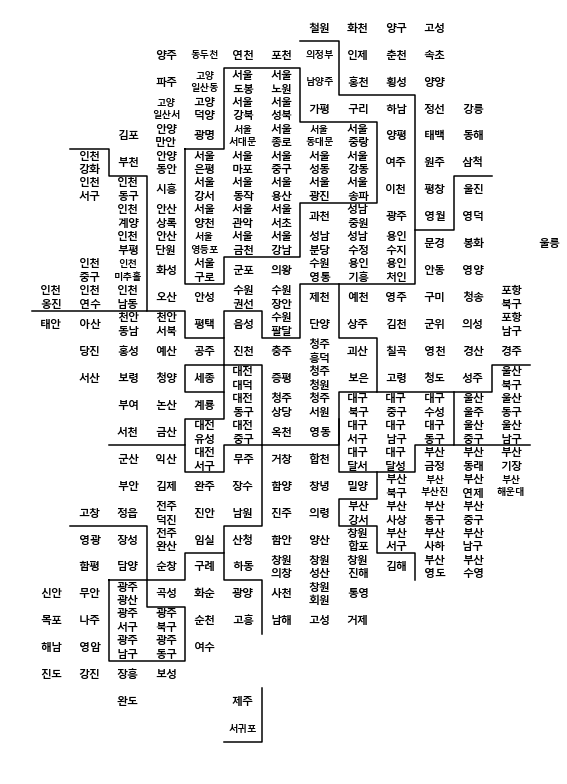

In [22]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in map_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
pop = pd.merge(pop, map_korea, how='left', on='ID')
pop.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID,y,x
0,강원,강릉시,46008,20993,40497,203057,101154,101903,1.036768,False,강릉,3,11
1,강원,고성군,4006,1699,7005,23621,11933,11688,0.485082,True,고성(강원),0,10
2,강원,동해시,16311,7510,16152,83888,42093,41795,0.929916,True,동해,4,11
3,강원,삼척시,12428,5280,14953,61833,31630,30203,0.706213,True,삼척,5,11
4,강원,속초시,15928,7411,14010,76302,37488,38814,1.057959,False,속초,1,10


In [24]:
pop.isnull().sum()

광역시도        0
시군구         0
20~39세계     0
20~39세여자    0
65세이상계      0
인구수계        0
인구수남자       0
인구수여자       0
소멸비율        0
소멸위기지역      0
ID          0
y           0
x           0
dtype: int64

In [25]:
pop.to_csv('./results/02.pop.csv', encoding='utf-8')

### 지도 그리는 함수

In [26]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                     min(blockedMap[targetData]))*0.25 + \
                     min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
        if len(row.ID.split())==2:
            dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
        elif row.ID[:2]=='고성':
            dispname = '고성'
        else:
            dispname = row.ID

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 표시
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

### 인구 현황 및 인구 소멸위기 지역 확인

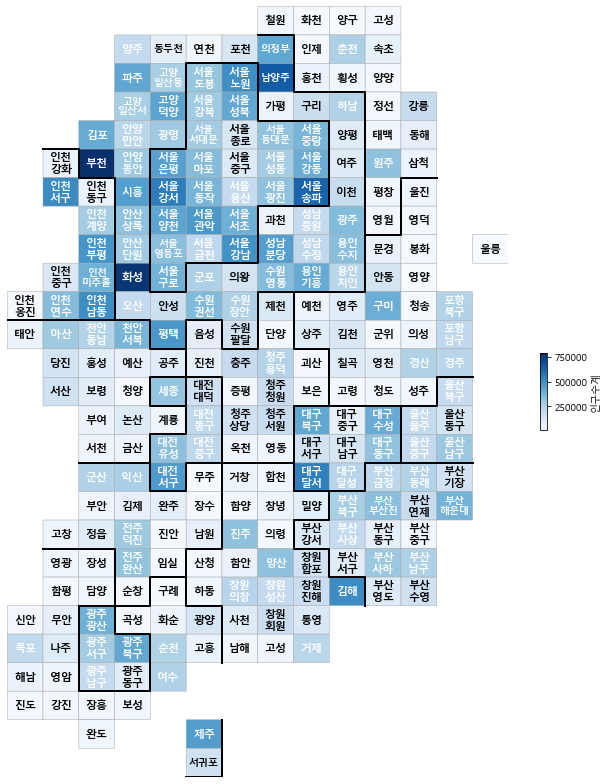

In [27]:
drawKorea('인구수계', pop, 'Blues')

#### 인구 소멸위기 지역

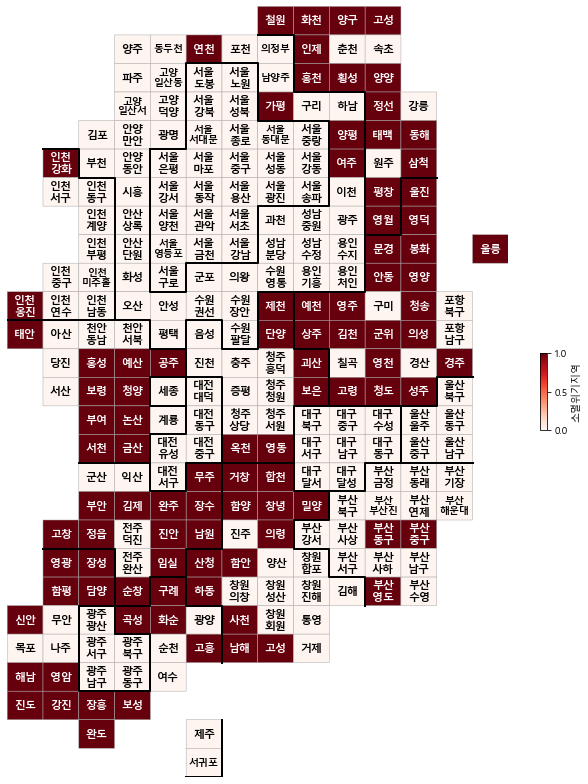

In [28]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

### 여성 인구 비율 확인

In [29]:
# 표현하고자 하는 값에 음수가 있을 경우 처리해주기 위해 약간 수정
def drawKoreaMinus(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
        if len(row.ID.split())==2:
            dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
        elif row.ID[:2]=='고성':
            dispname = '고성'
        else:
            dispname = row.ID

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

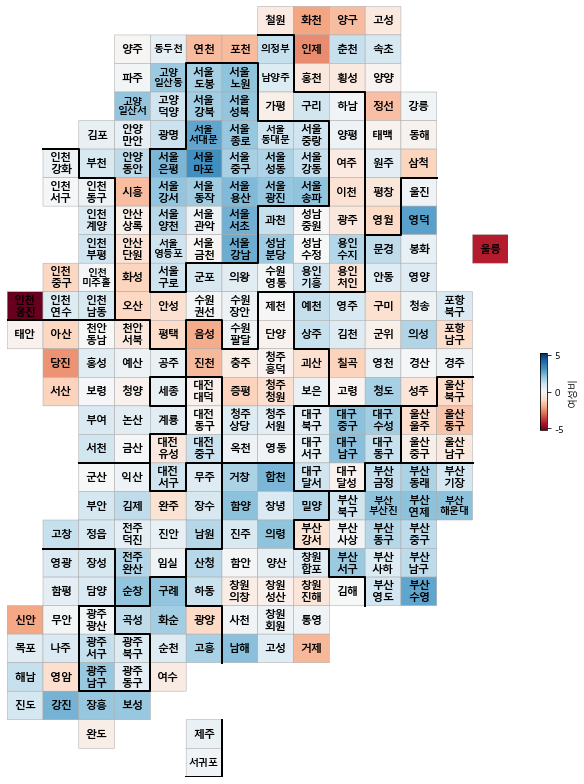

In [30]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수계'] - 0.5) * 100
drawKoreaMinus('여성비', pop, 'RdBu')

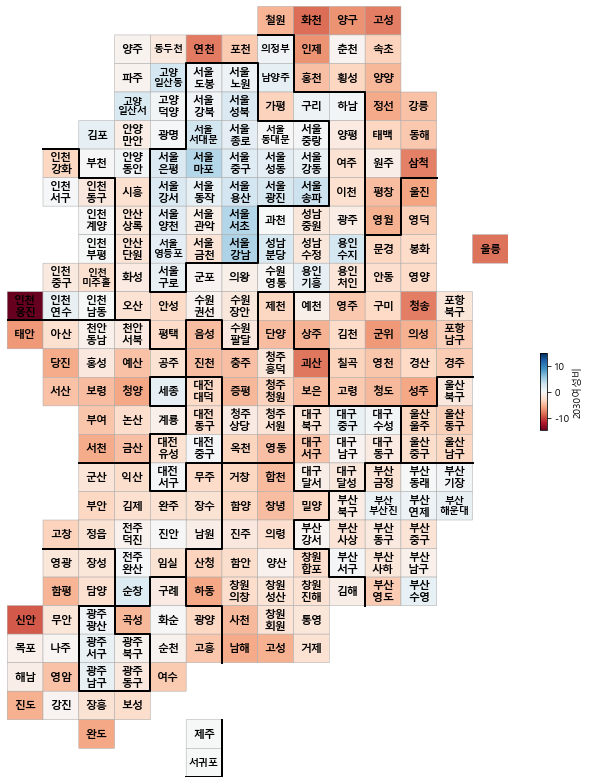

In [31]:
pop['2030여성비'] = (pop['20~39세여자'] / pop['20~39세계'] - 0.5) * 100
drawKoreaMinus('2030여성비', pop, 'RdBu')

In [32]:
pop.to_csv('./results/03.pop.csv', encoding='utf8')

### Folium에서 인구 소멸위기 지역 표시하기

In [33]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category='FutureWarning')

In [34]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원,강릉시,46008,20993,40497,203057,101154,101903,1.036768,0,3,11,0.184431,-4.370979
고성(강원),강원,고성군,4006,1699,7005,23621,11933,11688,0.485082,1,0,10,-0.518606,-7.588617
동해,강원,동해시,16311,7510,16152,83888,42093,41795,0.929916,1,4,11,-0.177618,-3.957452
삼척,강원,삼척시,12428,5280,14953,61833,31630,30203,0.706213,1,5,11,-1.153915,-7.515288
속초,강원,속초시,15928,7411,14010,76302,37488,38814,1.057959,0,1,10,0.868916,-3.471873


In [35]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = pop_folium['인구수계'],
               columns = [pop_folium.index, pop_folium['인구수계']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>기초자치단체별 인구수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

### 소멸위기 지역

In [36]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>소멸위기지역</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map